In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import date

%matplotlib inline

## Painel Coronavírus RS
<a href="https://ti.saude.rs.gov.br/covid19/api/" target="_blank">Link para a base de dados</a> <br>

Database contém dados no período de 18/06/2021 à 03/02/2022
<br>
<br>

In [15]:
df = pd.read_csv('20220218.csv', sep=';')
df.head()

,COD_IBGE,MUNICIPIO,COD_REGIAO_COVID,REGIAO_COVID,SEXO,FAIXAETARIA,CRITERIO,DATA_CONFIRMACAO,DATA_SINTOMAS,DATA_INCLUSAO,...,DATA_INCLUSAO_OBITO,DATA_EVOLUCAO_ESTIMADA,RACA_COR,ETNIA_INDIGENA,PROFISSIONAL_SAUDE,BAIRRO,SRAG,FONTE_INFORMACAO,PAIS_NASCIMENTO,PES_PRIV_LIBERDADE
0,430003,ACEGUÁ,16,BAGE - R22,Masculino,20 a 29,TESTE RÁPIDO,31/01/2022,31/01/2022,03/02/2022,...,NaN,14/02/2022,BRANCA,NAO ENCONTRADO,NAO,DOM TIMOEO,NAO,E-SUS,URUGUAI,NAO
1,430003,ACEGUÁ,16,BAGE - R22,Feminino,20 a 29,TESTE RÁPIDO,31/01/2022,28/01/2022,03/02/2022,...,NaN,11/02/2022,BRANCA,NAO ENCONTRADO,NAO,COLONIA NOVA,NAO,E-SUS,BRASIL,NAO
2,430003,ACEGUÁ,16,BAGE - R22,Masculino,50 a 59,TESTE RÁPIDO,30/01/2022,27/01/2022,03/02/2022,...,NaN,10/02/2022,BRANCA,NAO ENCONTRADO,NAO,NOVA AURORA,NAO,E-SUS,BRASIL,NAO
3,430003,ACEGUÁ,16,BAGE - R22,Feminino,20 a 29,TESTE RÁPIDO,01/02/2022,28/01/2022,03/02/2022,...,NaN,11/02/2022,BRANCA,NAO ENCONTRADO,NAO,COLONIA NOVA,NAO,E-SUS,BRASIL,NAO
4,430003,ACEGUÁ,16,BAGE - R22,Masculino,20 a 29,TESTE RÁPIDO,30/01/2022,28/01/2022,03/02/2022,...,NaN,11/02/2022,BRANCA,NAO ENCONTRADO,NAO,DOM TIMOTEO,NAO,E-SUS,BRASIL,NAO


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2079492 entries, 0 to 2079491
Data columns (total 30 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   COD_IBGE                int64 
 1   MUNICIPIO               object
 2   COD_REGIAO_COVID        int64 
 3   REGIAO_COVID            object
 4   SEXO                    object
 5   FAIXAETARIA             object
 6   CRITERIO                object
 7   DATA_CONFIRMACAO        object
 8   DATA_SINTOMAS           object
 9   DATA_INCLUSAO           object
 10  DATA_EVOLUCAO           object
 11  EVOLUCAO                object
 12  HOSPITALIZADO           object
 13  FEBRE                   object
 14  TOSSE                   object
 15  GARGANTA                object
 16  DISPNEIA                object
 17  OUTROS                  object
 18  CONDICOES               object
 19  GESTANTE                object
 20  DATA_INCLUSAO_OBITO     object
 21  DATA_EVOLUCAO_ESTIMADA  object
 22  RACA_COR          

### Dicionário de Dados

In [17]:
df.shape

(2079492, 30)

In [18]:
df.isnull().sum()

COD_IBGE                        0
MUNICIPIO                       0
COD_REGIAO_COVID                0
REGIAO_COVID                    0
SEXO                            0
FAIXAETARIA                     0
CRITERIO                        0
DATA_CONFIRMACAO                0
DATA_SINTOMAS                   0
DATA_INCLUSAO                   0
DATA_EVOLUCAO             1967520
EVOLUCAO                        0
HOSPITALIZADO                   0
FEBRE                          20
TOSSE                          20
GARGANTA                       20
DISPNEIA                    10940
OUTROS                         20
CONDICOES                 1830524
GESTANTE                        0
DATA_INCLUSAO_OBITO       2041637
DATA_EVOLUCAO_ESTIMADA     198501
RACA_COR                        0
ETNIA_INDIGENA             115821
PROFISSIONAL_SAUDE              0
BAIRRO                        126
SRAG                            0
FONTE_INFORMACAO               14
PAIS_NASCIMENTO            116171
PES_PRIV_LIBER

In [19]:
def categoriza_criterio(x):
    if x == 'TESTE RÁPIDO':
        return 1
    elif x == 'RT-PCR':
        return 2
    elif x == 'Clínico-Imagem':
        return 3
    elif x == 'Clínico Epidemiológico':
        return 4
    elif x == 'Clínico':
        return 5
    elif x == 'Outros Testes' or x == 'Outros testes':
        return  6
    else:
        return 7
    
df['CAT_CRITERIO'] = df.CRITERIO.apply(categoriza_criterio)

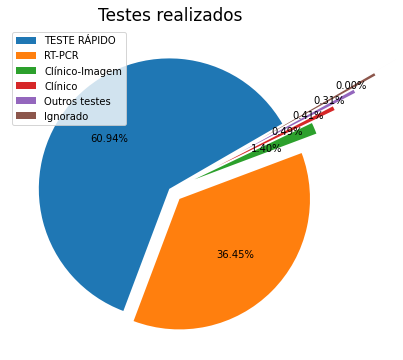

In [20]:
# plt.figure(figsize=[12,6])
# plt.pie(df.CAT_CRITERIO.value_counts(), autopct='%1.0f%%');
# plt.legend(['TESTE RÁPIDO','RT-PCR','Clínico-Imagem','Clínico','Outros testes','Ignorado'])
# plt.title('Testes realizados', fontsize=17);

explode = (0.01, 0.1, 0.2,0.4,0.6,0.8,1) 
plt.figure(figsize=[12,6]) 
plt.pie(df.CAT_CRITERIO.value_counts(), autopct='%1.2f%%', explode=explode,startangle=30);
plt.legend(['TESTE RÁPIDO','RT-PCR','Clínico-Imagem','Clínico','Outros testes','Ignorado']) 
plt.title('Testes realizados', fontsize=17);


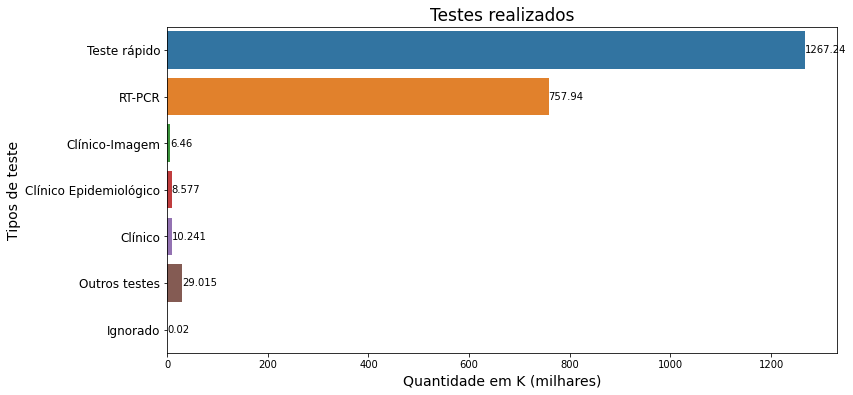

In [21]:
labels=['Teste rápido','RT-PCR','Clínico-Imagem','Clínico Epidemiológico','Clínico','Outros testes','Ignorado']
df2 = df.pivot_table(index='CAT_CRITERIO', values='CRITERIO', aggfunc='count')
df2.reset_index(inplace=True)
plt.figure(figsize=[12,6])
df2['CRITERIO']= df2['CRITERIO']/1000

ax = sns.barplot(data=df2, x='CRITERIO', y='CAT_CRITERIO', orient='h')
ax.set_title('Testes realizados', fontsize=17) 
ax.set_ylabel('Tipos de teste', fontsize=14)
ax.set_xlabel('Quantidade em K (milhares)', fontsize=14)
ax.set_yticklabels(labels, fontsize=12)
ax.bar_label(ax.containers[0]);

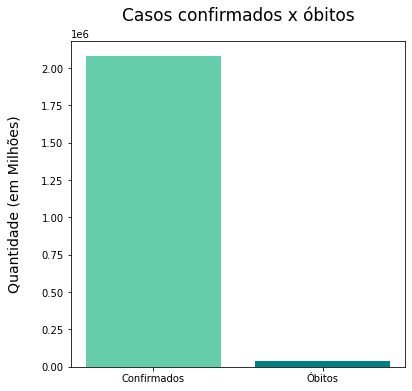

In [22]:
plt.figure(figsize=[6,6])
ax1 = plt.bar(['Confirmados','Óbitos'], [df.DATA_CONFIRMACAO.count(), df.DATA_INCLUSAO_OBITO.count()], color=['#66CDAA', '#008080'])
plt.title('Casos confirmados x óbitos', fontsize=17, pad=20)
plt.ylabel('Quantidade (em Milhões)', fontsize=14, labelpad=20);

In [36]:
casos_obitos = df.pivot_table(index='ANO',values=['DATA_INCLUSAO_OBITO','DATA_CONFIRMACAO'],aggfunc='count', margins= True,margins_name = 'Total')
casos_obitos
# casos_obitos_merge = df_obitos_municipio.merge(casos_cod_regiao, on='ANO', how='inner') 
# casos_obitos_merge.pivot_table(index='ANO', values=['DATA_INCLUSAO_OBITO','DATA_CONFIRMACAO' ], margins=True, aggfunc='sum', margins_name='Total')

,DATA_CONFIRMACAO,DATA_INCLUSAO_OBITO
ANO,,
2020,511889,10117
2021,1000961,26435
2022,566642,1303
Total,37855,37855


In [37]:
df3 = df.pivot_table(index='COD_REGIAO_COVID', values='DATA_INCLUSAO_OBITO', aggfunc='count')
df3.reset_index(inplace=True)

fig=px.scatter(data_frame=df3, x='COD_REGIAO_COVID', y='DATA_INCLUSAO_OBITO', size='DATA_INCLUSAO_OBITO', color_discrete_sequence=['#4B089B'])
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = df.COD_REGIAO_COVID.sort_values(ascending=True).unique(),
        ticktext = df.REGIAO_COVID.sort_values(ascending=True).unique(),
    ),
    xaxis_title='Região',
    yaxis_title='Quantidade de mortes',
    title='Quantidade de mortes por região',
    template='ggplot2'
)

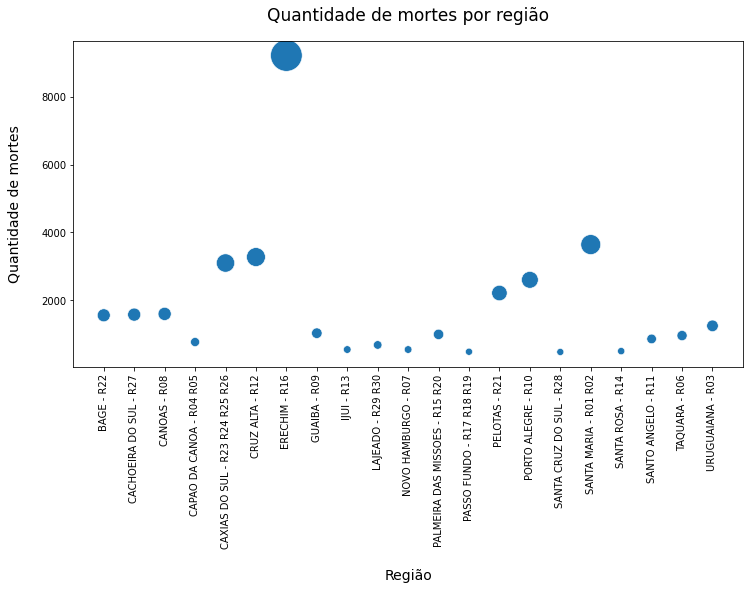

In [25]:
plt.figure(figsize=[12,6])
ax = sns.scatterplot(data=df3, x='COD_REGIAO_COVID', y='DATA_INCLUSAO_OBITO', legend=False, size='DATA_INCLUSAO_OBITO', sizes=(50,1000))
ax.set_title('Quantidade de mortes por região', fontsize=17, pad=20)
ax.set_ylabel('Quantidade de mortes', fontsize=14, labelpad=20)
ax.set_xlabel('Região', fontsize=14, labelpad=20)
ax.set_xticks(df.COD_REGIAO_COVID.sort_values(ascending=True).unique())
ax.set_xticklabels(df.REGIAO_COVID.sort_values(ascending=True).unique(), rotation=90);

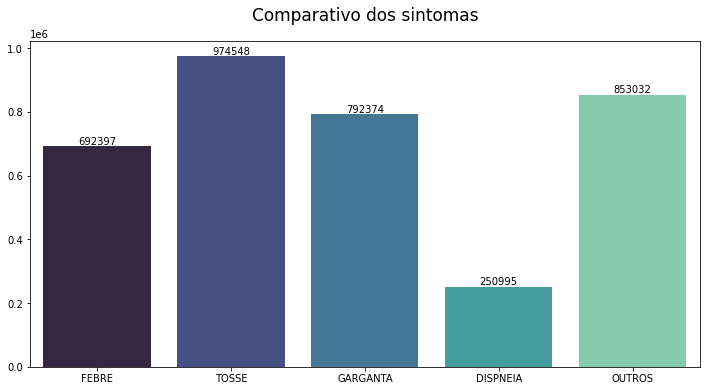

In [26]:
sintomas = df.loc[:,['FEBRE','TOSSE','GARGANTA','DISPNEIA','OUTROS']]
sintomas.dropna(inplace=True)

temp = {}

def categoriza_sintomas(x):
    if x == 'SIM':
        return 1
    else:
        return 0
    
for item in sintomas.columns:
    sintomas[item] = sintomas[item].apply(categoriza_sintomas)
    temp[item] = sintomas[item].sum()
    
sintomas2 = pd.DataFrame.from_dict(temp, orient='index').reset_index()
sintomas2.columns = ['sintoma','qtd']

plt.figure(figsize=[12,6])
ax = sns.barplot(data=sintomas2, x='sintoma', y='qtd', palette='mako')
ax.bar_label(ax.containers[0]);
ax.set_title('Comparativo dos sintomas', fontsize=17, pad=20) 
ax.set_ylabel(None)
ax.set_xlabel(None);

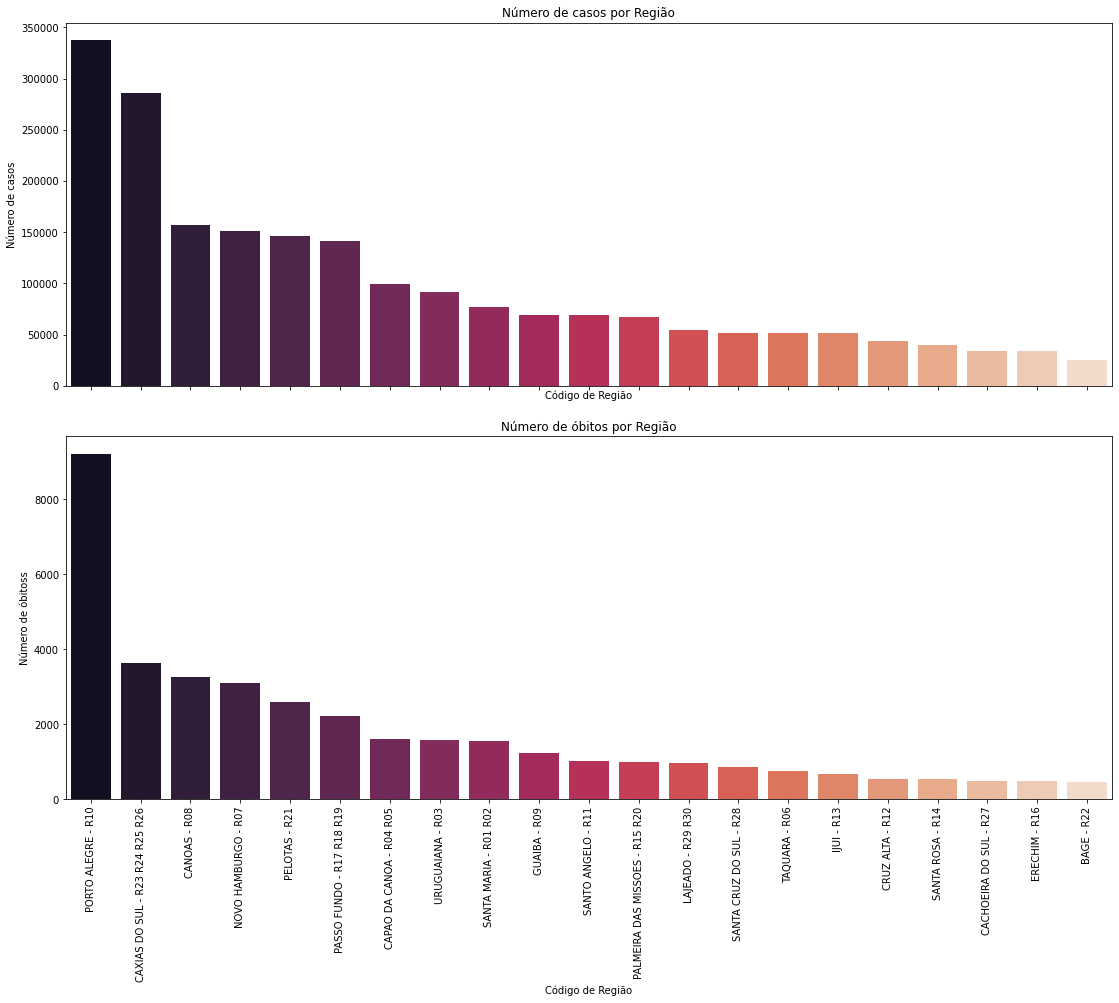

In [27]:
casos_cod_regiao = df.groupby('REGIAO_COVID')[['DATA_CONFIRMACAO']].count()
casos_cod_regiao_sorted = casos_cod_regiao.sort_values('DATA_CONFIRMACAO', ascending=False)
casos_cod_regiao_sorted

df_obitos = df[['MUNICIPIO', 'REGIAO_COVID', 'SEXO','FAIXAETARIA', 
                      'DATA_CONFIRMACAO', 'DATA_INCLUSAO_OBITO']].dropna()
df_obitos_regiao = df_obitos.groupby('REGIAO_COVID').agg({'DATA_INCLUSAO_OBITO':'count'})
df_obitos_regiao_sorted = df_obitos_regiao.sort_values('DATA_INCLUSAO_OBITO')


fig, axs = plt.subplots(2, 1, figsize=(16,12), sharex = True)

ax1 = sns.barplot(data=casos_cod_regiao_sorted, 
            x=casos_cod_regiao_sorted.index,
            y='DATA_CONFIRMACAO',
            ax=axs[0],
            palette='rocket',
            order=casos_cod_regiao_sorted.sort_values('DATA_CONFIRMACAO', ascending=False).index)\
            .set(title='Número de casos por Região', xlabel="Código de Região",ylabel = "Número de casos")

ax2 = sns.barplot(data=df_obitos_regiao_sorted, 
            x=df_obitos_regiao_sorted.index,
            y='DATA_INCLUSAO_OBITO',
            ax=axs[1],
            palette='rocket',
            order=df_obitos_regiao_sorted.sort_values('DATA_INCLUSAO_OBITO', ascending=False).index)\
            .set(title='Número de óbitos por Região', xlabel="Código de Região",ylabel = "Número de óbitoss");


fig.tight_layout(pad=2)

plt.xticks(rotation=90)
plt.show()

In [28]:
df['DATA_CONF']=pd.to_datetime(df['DATA_CONFIRMACAO'], format='%d/%m/%Y')
df['SEMANA_CONF']=df['DATA_CONF'].dt.strftime('%Y-%U')
df['DATA_OBT']=pd.to_datetime(df['DATA_INCLUSAO_OBITO'], format='%d/%m/%Y')
df['SEMANA_OBT']=df['DATA_OBT'].dt.strftime('%Y-%U')

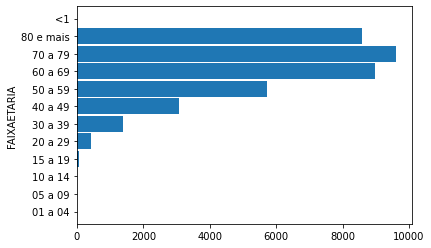

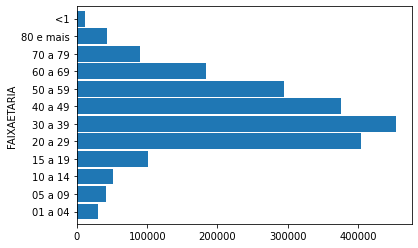

In [29]:
df.groupby(['FAIXAETARIA'])[['DATA_INCLUSAO_OBITO']].count().plot(kind='barh', width=0.9, legend = False)
df.groupby(['FAIXAETARIA'])[['DATA_CONFIRMACAO']].count().plot(kind='barh', width=0.9, legend = False)
plt.show()

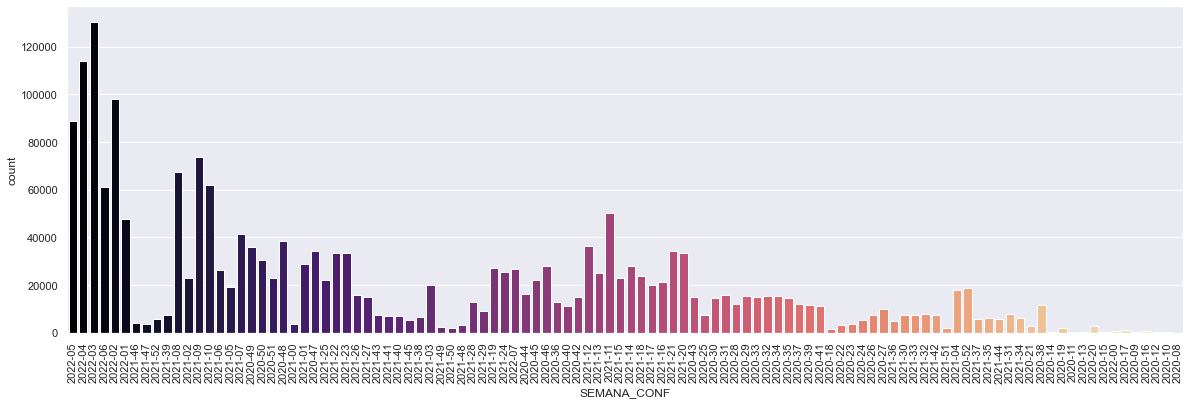

In [30]:
sns.set(rc={'figure.figsize':(20,6)})
sns.countplot(data=df, x='SEMANA_CONF', palette='magma')
plt.xticks(rotation=90)
plt.show()

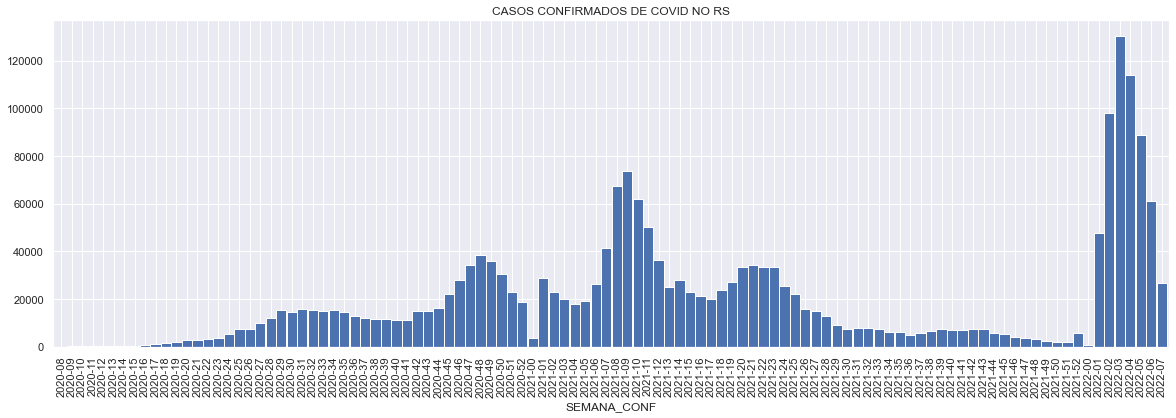

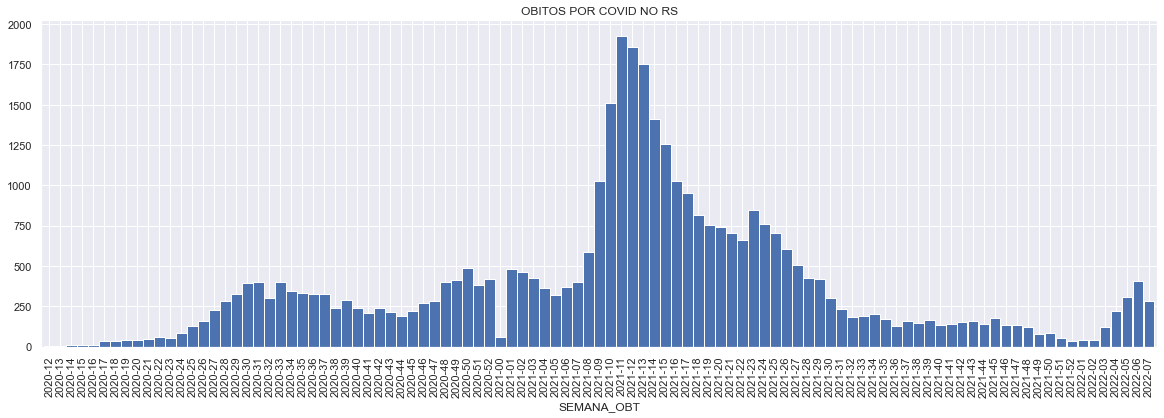

In [31]:
df.pivot_table(index='SEMANA_CONF', values='SEXO', aggfunc='count').plot(kind='bar', legend = False, title='CASOS CONFIRMADOS DE COVID NO RS', width=0.98)
df.pivot_table(index='SEMANA_OBT', values='SEXO', aggfunc='count').plot(kind='bar', title='OBITOS POR COVID NO RS', width=0.98, legend = False)
plt.show()


In [32]:
df['DATA']=pd.to_datetime(df['DATA_CONFIRMACAO'], format='%d/%m/%Y')
df['ANO']=pd.DatetimeIndex(df['DATA']).year
df['MES']=pd.DatetimeIndex(df['DATA']).month
df['SEMANA']=df['DATA'].dt.strftime('%Y-%U')

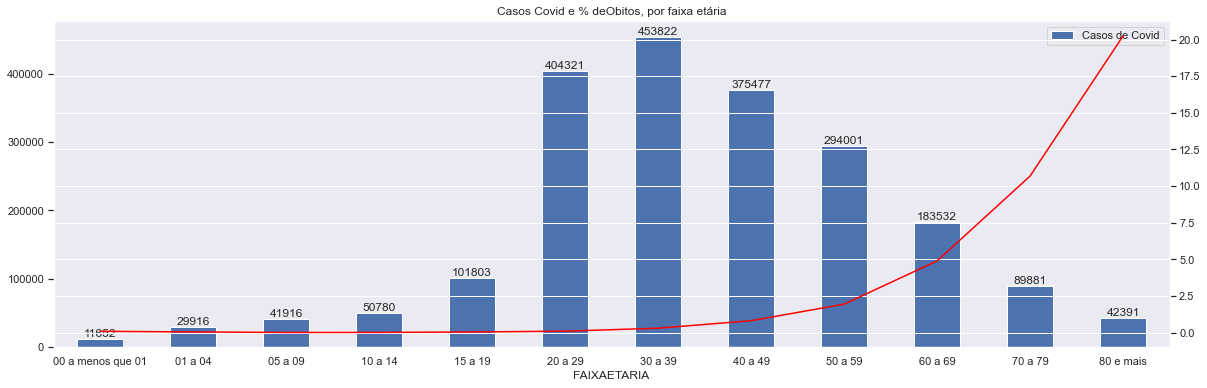

In [33]:
df.loc[df["FAIXAETARIA"] == "<1", "FAIXAETARIA"] = "00 a menos que 01"
df_faixaetaria = df.pivot_table(index = ['FAIXAETARIA'], values = ['DATA_CONFIRMACAO','DATA_INCLUSAO_OBITO'] ,aggfunc = 'count').reset_index()
df_faixaetaria['%obito'] = (df_faixaetaria['DATA_INCLUSAO_OBITO'] / df_faixaetaria['DATA_CONFIRMACAO'])*100

ax1 = df_faixaetaria.plot(x='FAIXAETARIA',y='DATA_CONFIRMACAO', kind ='bar', label ='Casos de Covid',title = 'Casos Covid e % deObitos, por faixa etária')
ax2 = df_faixaetaria['%obito'].plot(secondary_y=True,kind='line', c='red')
ax1.bar_label(ax1.containers[0]);

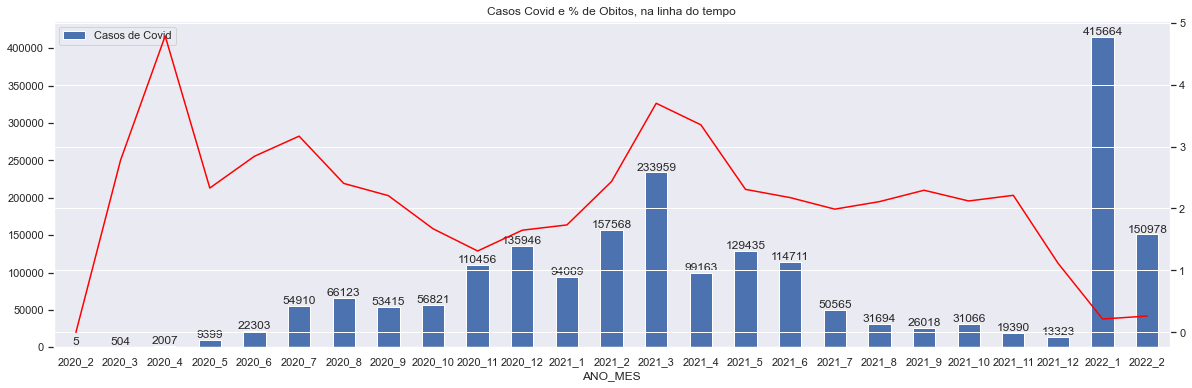

In [34]:
df_timeline = df.pivot_table(index = ['ANO','MES'], values = ['DATA_CONFIRMACAO','DATA_INCLUSAO_OBITO'] ,aggfunc = 'count').reset_index()
df_timeline['%obito'] = (df_timeline['DATA_INCLUSAO_OBITO'] / df_timeline['DATA_CONFIRMACAO'])*100
df_timeline['ANO_MES'] = df_timeline['ANO'].astype('str')+'_'+df_timeline['MES'].astype('str')
ax1 = df_timeline.plot(x='ANO_MES',y='DATA_CONFIRMACAO', kind ='bar', label ='Casos de Covid',title = 'Casos Covid e % de Obitos, na linha do tempo')
ax2 = df_timeline['%obito'].plot(secondary_y=True,kind='line', c='red')
ax1.bar_label(ax1.containers[0]);

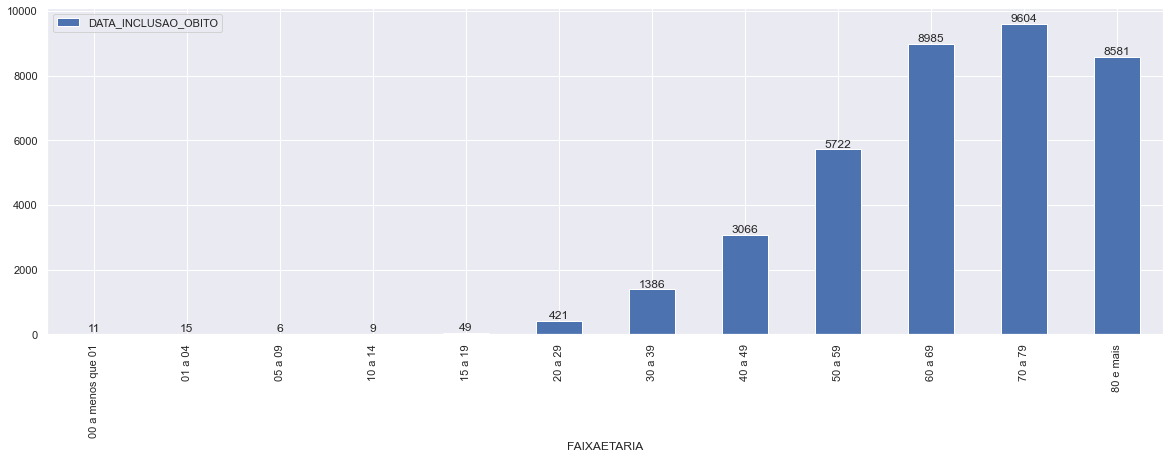

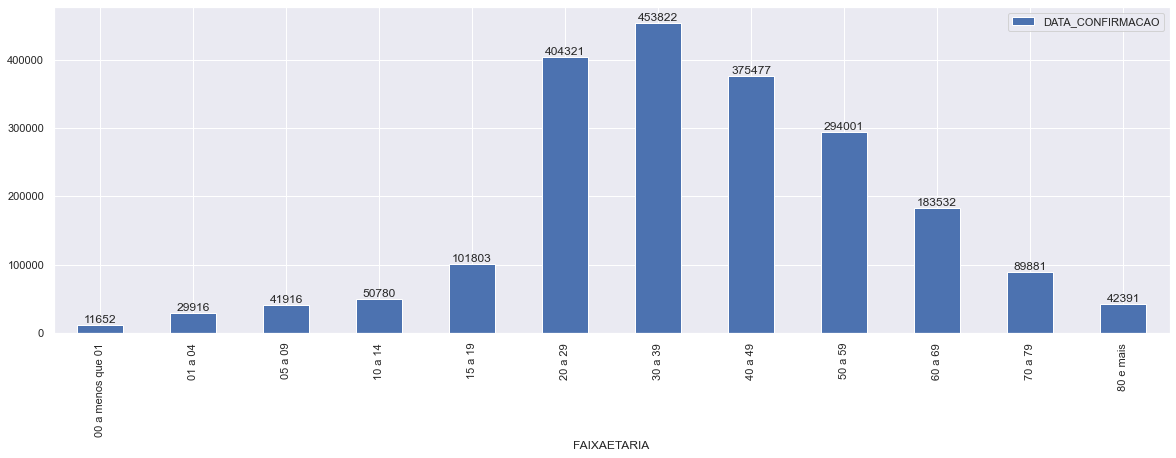

In [35]:
ax1 = df.groupby(['FAIXAETARIA'])[['DATA_INCLUSAO_OBITO']].count().plot(kind='bar')
ax2 = df.groupby(['FAIXAETARIA'])[['DATA_CONFIRMACAO']].count().plot(kind='bar')
ax1.bar_label(ax1.containers[0])
ax2.bar_label(ax2.containers[0]);